In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
x = np.arange(1,11) * (100 + np.random.randn(10))
y = 2 * x + np.random.randn(10)*5
X = np.vstack((x,y))
print(X)

[[  98.70842929  200.78638413  295.99642677  401.00339587  503.85281248
   604.86288313  709.10653833  802.95611117  906.12811082  995.16225731]
 [ 197.56211248  399.20670964  590.02860863  800.0614098  1013.84524805
  1215.25286607 1416.23898799 1609.06919812 1807.31125009 1985.07561528]]


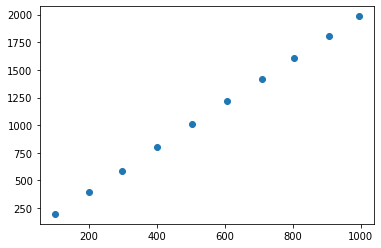

In [ ]:
plt.scatter(X[0], X[1])
plt.show()

In [ ]:
Xcentered = (X[0] - x.mean(), X[1] - y.mean())
m = (x.mean(), y.mean())
print(Xcentered)
print("Mean vector: ", m)

(array([-453.14790564, -351.0699508 , -255.85990816, -150.85293906,
        -48.00352245,   53.0065482 ,  157.2502034 ,  251.09977624,
        354.27177589,  443.30592238]), array([-905.80308813, -704.15849098, -513.33659199, -303.30379082,
        -89.51995256,  111.88766545,  312.87378738,  505.7039975 ,
        703.94604948,  881.71041466]))
Mean vector:  (551.8563349301119, 1103.3652006133027)


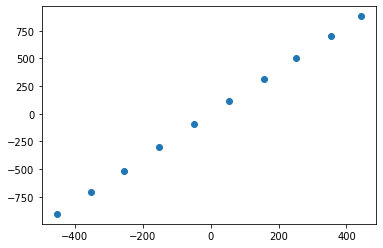

In [ ]:
plt.scatter(Xcentered[0], Xcentered[1])
plt.show()

In [ ]:
X.T.shape

(10, 2)

In [ ]:
covmat = np.cov(Xcentered)
print(covmat, "\n")
print("Variance of X: ", np.cov(Xcentered)[0,0])
print("Variance of Y: ", np.cov(Xcentered)[1,1])
print("Covariance X and Y: ", np.cov(Xcentered)[0,1])

[[ 92415.04722077 184603.72507421]
 [184603.72507421 368770.95205448]] 

Variance of X:  92415.04722076502
Variance of Y:  368770.9520544837
Covariance X and Y:  184603.72507421314


In [ ]:
covmat

array([[ 92415.04722077, 184603.72507421],
       [184603.72507421, 368770.95205448]])

In [ ]:
_, vecs = np.linalg.eig(covmat)
v = vecs[:,1]
Xnew = np.dot(v, Xcentered)
print(Xnew)

[1012.82880584  786.82123625  573.56582558  338.74626371  101.53827918
 -123.77935271 -350.16755866 -564.60982836 -788.06453302 -986.87913781]


In [ ]:
v, v.shape

(array([-0.44763997, -0.89421387]), (2,))

In [ ]:
Xcentered

(array([-453.14790564, -351.0699508 , -255.85990816, -150.85293906,
         -48.00352245,   53.0065482 ,  157.2502034 ,  251.09977624,
         354.27177589,  443.30592238]),
 array([-905.80308813, -704.15849098, -513.33659199, -303.30379082,
         -89.51995256,  111.88766545,  312.87378738,  505.7039975 ,
         703.94604948,  881.71041466]))

In [ ]:
m

(551.8563349301119, 1103.3652006133027)

In [ ]:
n = 8     #номер элемента случайной величины
Xrestored = np.dot(Xnew[n],v) + m
print('Restored: ', Xrestored)
print('Original: ', X[:,n])

Restored:  [ 904.62552193 1808.06344022]
Original:  [ 906.12811082 1807.31125009]


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 1)
XPCAreduced = pca.fit_transform(np.transpose(X))

In [ ]:
for xn, x_pca in zip(Xnew, XPCAreduced):
    print(xn, '-', x_pca[0], '=', np.abs(xn - x_pca[0]))

1012.8288058370882 - 1012.8288058370886 = 3.410605131648481e-13
786.8212362544755 - 786.8212362544756 = 1.1368683772161603e-13
573.5658255750043 - 573.5658255750044 = 1.1368683772161603e-13
338.7462637114687 - 338.7462637114687 = 0.0
101.53827918463108 - 101.5382791846311 = 1.4210854715202004e-14
-123.77935271205641 - -123.77935271205642 = 1.4210854715202004e-14
-350.167558658897 - -350.16755865889706 = 5.684341886080802e-14
-564.6098283583107 - -564.6098283583108 = 1.1368683772161603e-13
-788.0645330203928 - -788.0645330203929 = 1.1368683772161603e-13
-986.8791378130106 - -986.879137813011 = 3.410605131648481e-13


In [ ]:
p = PCA(n_components=0.99)


In [ ]:
p.fit_transform(np.transpose(X))

array([[1012.82880584],
       [ 786.82123625],
       [ 573.56582558],
       [ 338.74626371],
       [ 101.53827918],
       [-123.77935271],
       [-350.16755866],
       [-564.60982836],
       [-788.06453302],
       [-986.87913781]])

In [ ]:
from sklearn import datasets as dts

In [ ]:
data = dts.load_diabetes()

In [ ]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
import pandas as pd

In [ ]:
data.data.shape

(442, 10)

In [ ]:
target = data.target

In [ ]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [ ]:
p1 = PCA(n_components=0.95)
p2 = PCA(n_components=0.5)

In [ ]:
dp1 = p1.fit_transform(df)

In [ ]:
dp2 = p2.fit_transform(df)

In [ ]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split 


In [ ]:
dp1_d = train_test_split(dp1,target, test_size=0.2)
dp2_d = train_test_split(dp2,target, test_size=0.2)
df_d = train_test_split(df,target, test_size=0.2)

In [ ]:
reg = LinearRegression()

for x_tr, x_ts, y_tr, y_ts in [dp1_d, dp2_d, df_x_d]:
    
    reg.fit(x_tr, y_tr)
    print(f'{reg.score(x_ts,y_ts)}')

 : 0.5596013433238893
 : 0.2848346992757599
 : 0.4788988737400556


In [ ]:
p1.explained_variance_

array([0.0091252 , 0.00338394])

array([[ 0.21643101,  0.18696711,  0.3031625 ,  0.2717397 ,  0.34325493,
         0.35186062, -0.28243639,  0.42883325,  0.37861731,  0.32218282],
       [ 0.04437151, -0.38654811, -0.15628061, -0.13825564,  0.57302669,
         0.45593985,  0.50624287, -0.06818423, -0.0261893 , -0.0849466 ]])

In [ ]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor as ABR

In [ ]:
X = dts.load_boston()['data']
y = dts.load_boston()['target']
res = []

for d in [x for x in range(1,11)]:
    X2 = PCA(n_components=d).fit_transform(X)
    x_train, x_test, y_train, y_test = train_test_split(X2, y, test_size = 0.3)
    model = RFR().fit(x_train, y_train)
    print(f'var = {d}, score = {model.score(x_test, y_test)}')
    res.append(model.score(x_test, y_test))

var = 1, score = 0.030334717864195948
var = 2, score = 0.43095528407054745
var = 3, score = 0.3989475376389683
var = 4, score = 0.4534100786028794
var = 5, score = 0.5298814183004694
var = 6, score = 0.7078351101741427
var = 7, score = 0.7250841171539342
var = 8, score = 0.7811895003033301
var = 9, score = 0.7568762714622982
var = 10, score = 0.7301145032683707


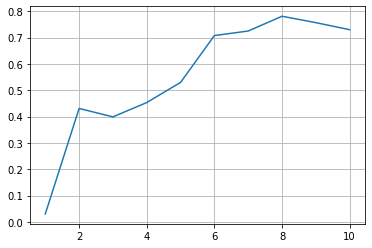

In [ ]:
import matplotlib.pyplot as plt
plt.plot([x for x in range(1,11)], res)
plt.grid()